In [1]:
%cd C:/Users/sylee/Documents/GitHub/DataSafe/DataSafe

C:\Users\sylee\Documents\GitHub\DataSafe\DataSafe


In [2]:
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
import matplotlib.pyplot as plt
# 그래프에서 한글 폰트 깨지는 문제에 대한 대처(전역 글꼴 설정)
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns

In [3]:
import pandas as pd
import numpy as np

path1 = 'C:/Users/sylee/Documents/GitHub/DataSafe/DataSafe/ExternalData.csv'

In [4]:
df = pd.read_csv(path1)
df.head()

,광역시도,시군구명,기타관광,레저스포츠,문화관광,쇼핑,자연관광,역사.체험관광,총 관광지 수,총면적,...,임야면적 비율,농업용지 비율,해면비율,육지 도시화 정도,해면 도시화 정도,도시지역 인구 (명),1인당 주거지역 (㎡),1인당 상업지역 (㎡),1인당 공업지역 (㎡),지수
0,강원도,강릉시,28.083333,56.750000,79.583333,24.083333,69.666667,53.083333,311.250000,1.046881e+09,...,79.566831,9.759298,0.006272,-84.396356,0.627164,188520.0,91.26,9.61,29.86,1.046
1,강원도,고성군,18.833333,35.416667,27.833333,7.583333,51.583333,18.083333,159.333333,6.614680e+08,...,82.520355,8.309360,0.000471,-96.291217,0.047090,14786.0,207.71,26.65,14.15,0.468
2,강원도,동해시,16.000000,11.583333,20.666667,13.000000,24.000000,9.666667,94.916667,1.981669e+08,...,67.485992,6.898456,0.090028,16.159127,9.002838,89092.0,148.32,25.13,100.46,0.862
3,강원도,삼척시,27.000000,17.000000,26.916667,8.416667,58.166667,23.083333,160.583333,1.191732e+09,...,87.481567,5.956220,0.000000,-86.593681,0.000000,50633.0,197.30,19.69,153.17,0.697
4,강원도,속초시,25.333333,22.166667,43.666667,12.916667,24.083333,16.333333,144.500000,1.107835e+08,...,69.939210,7.354720,0.045475,-28.605848,4.547517,82806.0,76.00,28.09,12.49,0.897


In [5]:
df.shape

(92, 21)

In [6]:
x = df.iloc[:,2:]  # 분석에 진행될 칼럼 선택
x

,기타관광,레저스포츠,문화관광,쇼핑,자연관광,역사.체험관광,총 관광지 수,총면적,도시비율,임야면적 비율,농업용지 비율,해면비율,육지 도시화 정도,해면 도시화 정도,도시지역 인구 (명),1인당 주거지역 (㎡),1인당 상업지역 (㎡),1인당 공업지역 (㎡),지수
0,28.083333,56.750000,79.583333,24.083333,69.666667,53.083333,311.250000,1.046881e+09,0.993728,79.566831,9.759298,0.006272,-84.396356,0.627164,188520.0,91.26,9.61,29.86,1.046
1,18.833333,35.416667,27.833333,7.583333,51.583333,18.083333,159.333333,6.614680e+08,0.999529,82.520355,8.309360,0.000471,-96.291217,0.047090,14786.0,207.71,26.65,14.15,0.468
2,16.000000,11.583333,20.666667,13.000000,24.000000,9.666667,94.916667,1.981669e+08,0.909972,67.485992,6.898456,0.090028,16.159127,9.002838,89092.0,148.32,25.13,100.46,0.862
3,27.000000,17.000000,26.916667,8.416667,58.166667,23.083333,160.583333,1.191732e+09,1.000000,87.481567,5.956220,0.000000,-86.593681,0.000000,50633.0,197.30,19.69,153.17,0.697
4,25.333333,22.166667,43.666667,12.916667,24.083333,16.333333,144.500000,1.107835e+08,0.954525,69.939210,7.354720,0.045475,-28.605848,4.547517,82806.0,76.00,28.09,12.49,0.897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,1.666667,17.583333,55.166667,22.083333,0.333333,13.166667,110.000000,3.208246e+07,1.000000,22.219756,3.511367,0.000000,100.000000,0.000000,489118.0,28.82,4.09,7.61,1.132
88,13.333333,63.916667,125.250000,21.083333,11.500000,13.250000,248.333333,1.322554e+08,1.000000,18.971929,11.065046,0.000000,69.910349,0.000000,589013.0,46.66,8.27,31.83,1.311
89,7.083333,46.166667,117.083333,18.916667,6.833333,17.916667,214.000000,7.422467e+07,0.901417,5.215615,1.395477,0.098583,90.141681,9.858319,385796.0,59.47,12.67,20.03,1.501
90,22.500000,15.583333,5.416667,2.000000,45.083333,4.750000,95.333333,1.673990e+08,1.000000,72.373252,17.218051,0.000000,-95.246605,0.000000,0.0,0.00,0.00,0.00,0.161


In [7]:
pca = PCA(n_components = 15)
pca.fit(x)
for i in range(15) :
    print("{}번째 차원 설명력: {}".format(i+1,round(pca.explained_variance_ratio_[i],2)))
    print("{}번째까지의 설명력: {}".format(i+1,round(np.cumsum(pca.explained_variance_ratio_)[i],2)))
    print("--------------------------------------------")


1번째 차원 설명력: 1.0
1번째까지의 설명력: 1.0
--------------------------------------------
2번째 차원 설명력: 0.0
2번째까지의 설명력: 1.0
--------------------------------------------
3번째 차원 설명력: 0.0
3번째까지의 설명력: 1.0
--------------------------------------------
4번째 차원 설명력: 0.0
4번째까지의 설명력: 1.0
--------------------------------------------
5번째 차원 설명력: 0.0
5번째까지의 설명력: 1.0
--------------------------------------------
6번째 차원 설명력: 0.0
6번째까지의 설명력: 1.0
--------------------------------------------
7번째 차원 설명력: 0.0
7번째까지의 설명력: 1.0
--------------------------------------------
8번째 차원 설명력: 0.0
8번째까지의 설명력: 1.0
--------------------------------------------
9번째 차원 설명력: 0.0
9번째까지의 설명력: 1.0
--------------------------------------------
10번째 차원 설명력: 0.0
10번째까지의 설명력: 1.0
--------------------------------------------
11번째 차원 설명력: 0.0
11번째까지의 설명력: 1.0
--------------------------------------------
12번째 차원 설명력: 0.0
12번째까지의 설명력: 1.0
--------------------------------------------
13번째 차원 설명력: 0.0
13번째까지의 설명력: 1.0
------------------------------------

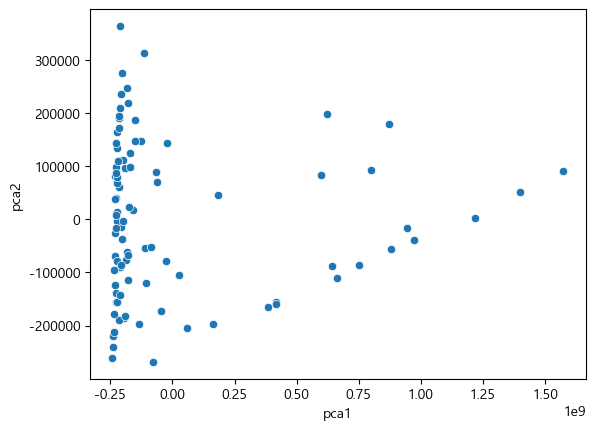

<Figure size 1500x1500 with 0 Axes>

In [8]:
pca = PCA(n_components = 2)  #2차원으로 pca 진행

pca_data = pca.fit_transform(x) #데이터 변환 후 변수에 저장

df['pca1'] = pca_data[:,0] #데이터파일에 pca변수 추가
df['pca2'] = pca_data[:,1]

sns.scatterplot(x = df['pca1'], y=df['pca2'])
plt.figure(figsize=(15,15))
plt.show()

C:\Users\sylee\anaconda3\envs\pythonEx\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sylee\anaconda3\envs\pythonEx\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sylee\anaconda3\envs\pythonEx\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sylee\anaconda3\envs\pythonEx\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known t

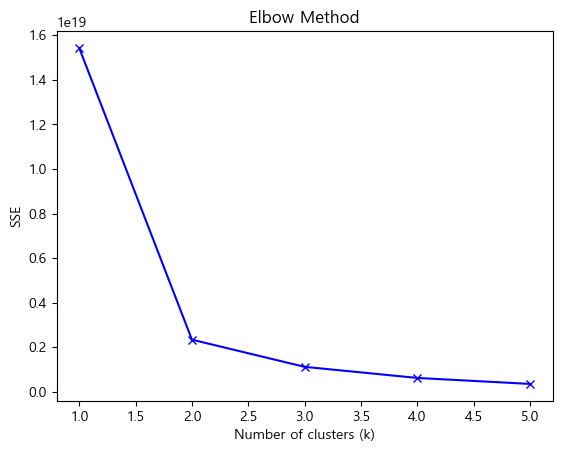

<Figure size 1200x1200 with 0 Axes>

In [9]:
x = df.iloc[:,-2:]  # 분석에 사용 될 pca 변수로 x 데이터 재정의

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = x

# K 값과 SSE를 저장할 리스트 생성
k_list = range(1, 6)
sse_list = []

# K 값을 변화시키면서 SSE 계산
for k in k_list:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    sse_list.append(kmeans.inertia_)

# SSE 그래프 출력
plt.plot(k_list, sse_list, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.figure(figsize=(12,12))
plt.show()

C:\Users\sylee\anaconda3\envs\pythonEx\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sylee\anaconda3\envs\pythonEx\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sylee\anaconda3\envs\pythonEx\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sylee\anaconda3\envs\pythonEx\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known t

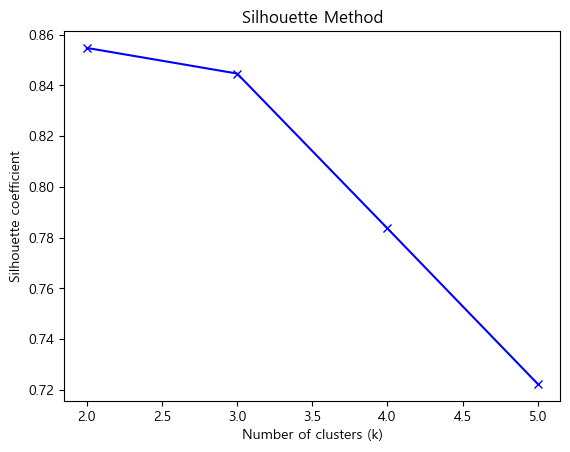

<Figure size 1200x1200 with 0 Axes>

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 데이터 불러오기
X = x
# K 값과 Silhouette coefficient를 저장할 리스트 생성
k_list = range(2, 6)
silhouette_list = []

# K 값을 변화시키면서 Silhouette coefficient 계산
for k in k_list:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X, labels)
    silhouette_list.append(silhouette_avg)

# Silhouette coefficient 그래프 출력
plt.plot(k_list, silhouette_list, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette coefficient')
plt.title('Silhouette Method')
plt.figure(figsize=(12,12))
plt.show()



C:\Users\sylee\anaconda3\envs\pythonEx\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sylee\anaconda3\envs\pythonEx\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0 0 1 0 1 0 0 0 0 2 0 0 0 1 2 2 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1]


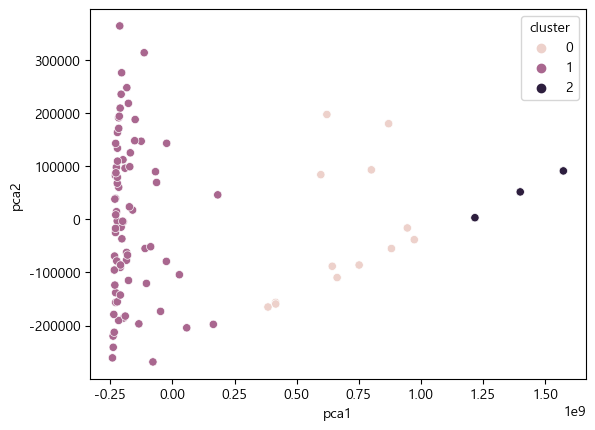

<Figure size 1200x1200 with 0 Axes>

In [11]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0)
kmeans.fit(x)

print(kmeans.labels_)
df['cluster'] = kmeans.labels_  # 각 군집에 해당하는 행정동을 파악하기 위해 라벨 값을 칼럼으로 추가

sns.scatterplot(x = df['pca1'], y=df['pca2'], hue=df['cluster'])
plt.figure(figsize=(12,12))
plt.show()

In [12]:
df

,광역시도,시군구명,기타관광,레저스포츠,문화관광,쇼핑,자연관광,역사.체험관광,총 관광지 수,총면적,...,육지 도시화 정도,해면 도시화 정도,도시지역 인구 (명),1인당 주거지역 (㎡),1인당 상업지역 (㎡),1인당 공업지역 (㎡),지수,pca1,pca2,cluster
0,강원도,강릉시,28.083333,56.750000,79.583333,24.083333,69.666667,53.083333,311.250000,1.046881e+09,...,-84.396356,0.627164,188520.0,91.26,9.61,29.86,1.046,8.007954e+08,93221.281586,0
1,강원도,고성군,18.833333,35.416667,27.833333,7.583333,51.583333,18.083333,159.333333,6.614680e+08,...,-96.291217,0.047090,14786.0,207.71,26.65,14.15,0.468,4.153821e+08,-156355.561133,0
2,강원도,동해시,16.000000,11.583333,20.666667,13.000000,24.000000,9.666667,94.916667,1.981669e+08,...,16.159127,9.002838,89092.0,148.32,25.13,100.46,0.862,-4.791900e+07,-173219.359317,1
3,강원도,삼척시,27.000000,17.000000,26.916667,8.416667,58.166667,23.083333,160.583333,1.191732e+09,...,-86.593681,0.000000,50633.0,197.30,19.69,153.17,0.697,9.456461e+08,-16161.613777,0
4,강원도,속초시,25.333333,22.166667,43.666667,12.916667,24.083333,16.333333,144.500000,1.107835e+08,...,-28.605848,4.547517,82806.0,76.00,28.09,12.49,0.897,-1.353023e+08,-196700.898965,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,인천광역시,부평구,1.666667,17.583333,55.166667,22.083333,0.333333,13.166667,110.000000,3.208246e+07,...,100.000000,0.000000,489118.0,28.82,4.09,7.61,1.132,-2.140035e+08,194124.054515,1
88,인천광역시,서구,13.333333,63.916667,125.250000,21.083333,11.500000,13.250000,248.333333,1.322554e+08,...,69.910349,0.000000,589013.0,46.66,8.27,31.83,1.311,-1.138306e+08,313731.413113,1
89,인천광역시,연수구,7.083333,46.166667,117.083333,18.916667,6.833333,17.916667,214.000000,7.422467e+07,...,90.141681,9.858319,385796.0,59.47,12.67,20.03,1.501,-1.718613e+08,99094.958642,1
90,인천광역시,옹진군,22.500000,15.583333,5.416667,2.000000,45.083333,4.750000,95.333333,1.673990e+08,...,-95.246605,0.000000,0.0,0.00,0.00,0.00,0.161,-7.868691e+07,-268365.957308,1


In [13]:
df.loc[df['cluster']== 0]

,광역시도,시군구명,기타관광,레저스포츠,문화관광,쇼핑,자연관광,역사.체험관광,총 관광지 수,총면적,...,육지 도시화 정도,해면 도시화 정도,도시지역 인구 (명),1인당 주거지역 (㎡),1인당 상업지역 (㎡),1인당 공업지역 (㎡),지수,pca1,pca2,cluster
0,강원도,강릉시,28.083333,56.750000,79.583333,24.083333,69.666667,53.083333,311.250000,1.046881e+09,...,-84.396356,0.627164,188520.0,91.26,9.61,29.86,1.046,8.007954e+08,93221.281586,0
1,강원도,고성군,18.833333,35.416667,27.833333,7.583333,51.583333,18.083333,159.333333,6.614680e+08,...,-96.291217,0.047090,14786.0,207.71,26.65,14.15,0.468,4.153821e+08,-156355.561133,0
3,강원도,삼척시,27.000000,17.000000,26.916667,8.416667,58.166667,23.083333,160.583333,1.191732e+09,...,-86.593681,0.000000,50633.0,197.30,19.69,153.17,0.697,9.456461e+08,-16161.613777,0
5,강원도,양구군,8.750000,7.833333,24.916667,2.000000,9.666667,10.250000,63.416667,6.618149e+08,...,-98.878841,0.000000,11771.0,123.59,13.92,5.32,0.640,4.157290e+08,-159302.304211,0
6,강원도,양양군,12.000000,78.250000,22.166667,2.333333,50.666667,35.166667,200.583333,6.305703e+08,...,-96.228489,0.043856,12239.0,211.61,50.88,1.77,0.741,3.844844e+08,-164982.689336,0
7,강원도,영월군,21.166667,20.083333,41.666667,6.500000,16.000000,33.333333,138.750000,1.127618e+09,...,-95.320412,0.000000,24500.0,143.62,22.59,43.91,0.716,8.815322e+08,-54911.131876,0
8,강원도,원주시,21.833333,56.083333,82.916667,17.500000,31.666667,60.916667,270.916667,8.677819e+08,...,-79.648089,0.000000,328007.0,79.45,7.61,19.39,1.187,6.216959e+08,197464.532788,0
10,강원도,정선군,30.000000,17.583333,36.333333,6.833333,22.583333,16.416667,129.750000,1.219720e+09,...,-93.024109,0.000000,23054.0,217.88,48.60,26.52,0.606,9.736341e+08,-38233.051385,0
11,강원도,철원군,16.333333,15.666667,23.750000,4.500000,20.000000,16.083333,96.333333,8.894346e+08,...,-94.050895,0.000000,38000.0,163.39,19.47,10.59,0.832,6.433487e+08,-88281.619862,0
12,강원도,춘천시,27.750000,83.000000,82.166667,20.916667,36.750000,48.083333,298.666667,1.116413e+09,...,-39.931290,0.000000,261724.0,81.39,6.43,12.41,1.115,8.703269e+08,180107.896001,0


In [19]:
df_1 = df.loc[df['cluster']== 1]
df_1

,광역시도,시군구명,기타관광,레저스포츠,문화관광,쇼핑,자연관광,역사.체험관광,총 관광지 수,총면적,...,육지 도시화 정도,해면 도시화 정도,도시지역 인구 (명),1인당 주거지역 (㎡),1인당 상업지역 (㎡),1인당 공업지역 (㎡),지수,pca1,pca2,cluster
2,강원도,동해시,16.000000,11.583333,20.666667,13.000000,24.000000,9.666667,94.916667,198166886.0,...,16.159127,9.002838,89092.0,148.32,25.13,100.46,0.862,-4.791900e+07,-173219.359317,1
4,강원도,속초시,25.333333,22.166667,43.666667,12.916667,24.083333,16.333333,144.500000,110783545.0,...,-28.605848,4.547517,82806.0,76.00,28.09,12.49,0.897,-1.353023e+08,-196700.898965,1
13,강원도,태백시,14.750000,6.416667,16.916667,4.000000,9.333333,10.666667,62.083333,303479336.0,...,-56.145722,0.000000,37457.0,220.93,33.97,42.89,0.719,5.739346e+07,-204130.675903,1
18,광주광역시,광산구,6.000000,31.750000,62.000000,12.500000,11.000000,21.250000,144.500000,222710809.0,...,81.155649,0.000000,400654.0,65.58,5.38,41.78,1.239,-2.337514e+07,143172.485068,1
19,광주광역시,남구,6.333333,11.333333,32.666667,2.166667,5.416667,14.916667,72.833333,60975039.0,...,99.507995,0.000000,212379.0,65.94,2.11,9.09,1.054,-1.851109e+08,-76929.373319,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,인천광역시,부평구,1.666667,17.583333,55.166667,22.083333,0.333333,13.166667,110.000000,32082459.0,...,100.000000,0.000000,489118.0,28.82,4.09,7.61,1.132,-2.140035e+08,194124.054515,1
88,인천광역시,서구,13.333333,63.916667,125.250000,21.083333,11.500000,13.250000,248.333333,132255385.0,...,69.910349,0.000000,589013.0,46.66,8.27,31.83,1.311,-1.138306e+08,313731.413113,1
89,인천광역시,연수구,7.083333,46.166667,117.083333,18.916667,6.833333,17.916667,214.000000,74224666.0,...,90.141681,9.858319,385796.0,59.47,12.67,20.03,1.501,-1.718613e+08,99094.958642,1
90,인천광역시,옹진군,22.500000,15.583333,5.416667,2.000000,45.083333,4.750000,95.333333,167398954.0,...,-95.246605,0.000000,0.0,0.00,0.00,0.00,0.161,-7.868691e+07,-268365.957308,1


In [18]:
df_2 = df.loc[df['cluster']== 2]
df_2

,광역시도,시군구명,기타관광,레저스포츠,문화관광,쇼핑,자연관광,역사.체험관광,총 관광지 수,총면적,...,육지 도시화 정도,해면 도시화 정도,도시지역 인구 (명),1인당 주거지역 (㎡),1인당 상업지역 (㎡),1인당 공업지역 (㎡),지수,pca1,pca2,cluster
9,강원도,인제군,14.666667,18.916667,24.750000,4.166667,35.083333,13.666667,111.250000,1.646252e+09,...,-98.197236,0.0,29037.0,117.52,19.18,7.53,0.724,1.400166e+09,51684.145371,2
14,강원도,평창군,25.916667,36.333333,48.000000,6.333333,25.166667,34.500000,176.250000,1.463831e+09,...,-97.720943,0.0,16387.0,292.62,29.97,0.00,0.628,1.217746e+09,3136.948977,2
15,강원도,홍천군,9.833333,27.916667,43.083333,4.916667,38.666667,36.166667,160.583333,1.819841e+09,...,-96.624403,0.0,34379.0,125.58,11.23,33.21,0.932,1.573755e+09,91185.570633,2


In [20]:
df.to_csv('ExternalKmeans.csv', index=False)